<a href="https://colab.research.google.com/github/Tarunsaip/Machine_Learning/blob/master/Clean_Major.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#Part 1 : Data Analysis

In [3]:
# importing libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score,mean_squared_log_error
from sklearn.preprocessing import LabelEncoder
from math import sqrt
from sklearn.feature_extraction.text import TfidfVectorizer
import lightgbm as lgbm
import scipy
import keras
from sklearn.model_selection import GridSearchCV, cross_validate
le = LabelEncoder()
import matplotlib.image as mpimg
import seaborn as sns
sns.set_style('darkgrid')

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data_train = pd.read_excel("/content/drive/My Drive/Data_Train.xlsx")
data_test = pd.read_excel("/content/drive/My Drive/Data_Test.xlsx")

In [5]:
data_train.shape , data_test.shape


((6019, 12), (1234, 11))

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   object 
 8   Engine             1224 non-null   object 
 9   Power              1224 non-null   object 
 10  Seats              1223 non-null   float64
dtypes: float64(1), int64(2), object(8)
memory usage: 106.2+ KB


In [8]:
data_train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [9]:
data_test.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

In [0]:
#data_train = data_train.dropna(how='any',axis=0)
#data_test = data_test.dropna(how='any',axis=0)
#print (data_train.isnull().sum())
##print (data_test.shape)
#print (data_test.isnull().sum())

In [11]:
data_test.Owner_Type.unique()

array(['First', 'Second', 'Third', 'Fourth & Above'], dtype=object)

In [12]:
data_test['Owner_Type'].value_counts()

First             1023
Second             184
Third               24
Fourth & Above       3
Name: Owner_Type, dtype: int64

In [0]:
#data_train["Owner_Type"].replace({"First": 1, "Second": 2, "Third": 3, "Fourth & Above": 4}, inplace=True)
#data_test["Owner_Type"].replace({"First": 1, "Second": 2, "Third": 3, "Fourth & Above": 4}, inplace=True)

In [0]:
#data_train = data_train[data_train.Owner_Type != 4]
#data_test = data_test[data_test.Owner_Type != 4]

In [15]:
print (len(data_train[data_train['Mileage'] == '0.0 kmpl']))
print (len(data_train[data_train['Power'] == 'null bhp']))

68
107


In [16]:
print (len(data_test[data_test['Mileage'] == '0.0 kmpl']))
print (len(data_test[data_test['Power'] == 'null bhp']))

13
22


In [0]:
#data_train = data_train[data_train.Mileage != '0.0 kmpl']
#data_test = data_test[data_test.Mileage != '0.0 kmpl']
#data_train = data_train[data_train.Power != 'null bhp']
#data_test = data_test[data_test.Power != 'null bhp']

In [18]:
data_train.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
Price                1373
dtype: int64

In [19]:
data_train.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [20]:
data_test['Fuel_Type'].value_counts()

Diesel    647
Petrol    579
CNG         6
LPG         2
Name: Fuel_Type, dtype: int64

In [21]:
data_train.Kilometers_Driven.unique()

array([72000, 41000, 46000, ..., 45004, 70602, 27365])

In [22]:
data_test['Kilometers_Driven'].value_counts()

65000    18
70000    17
45000    16
60000    14
46000    14
         ..
23742     1
17700     1
66848     1
80724     1
51200     1
Name: Kilometers_Driven, Length: 755, dtype: int64

# Part 2 : Data Cleaning and Inferences

In [0]:
data_train = data_train[data_train['Kilometers_Driven'] > 1000]
data_train = data_train[data_train['Fuel_Type'] != 'Electric']

In [24]:
len(data_train)

6006

We will make a column with the age of car and remove year
    We will do in a temporary dataframe so that if we dont get required accuracy (We consider it to be lower root mean square ) and then scale it btw 0-1 to get the accuracy (If not satisfied we can callback)

**We will mix both the train and test sets into the temporary data frame then we will split it into the Test and Train in 10:90**

In [0]:
tdf = data_train.append(data_test, ignore_index=True, sort=False)
tdf['Mileage'] = tdf['Mileage'].apply(lambda x : str(x).split(' ')[0]).astype(float)
tdf['Engine'] = tdf['Engine'].apply(lambda x : str(x).split(" ")[0]).astype(float)

In [0]:
data_test['Mileage'] = data_test['Mileage'].apply(lambda x : str(x).split(' ')[0]).astype(float)
data_test['Engine'] = data_test['Engine'].apply(lambda x : str(x).split(" ")[0]).astype(float)
data_train['Mileage'] = data_train['Mileage'].apply(lambda x : str(x).split(' ')[0]).astype(float)
data_train['Engine'] = data_train['Engine'].apply(lambda x : str(x).split(" ")[0]).astype(float)

In [0]:
tdf['Seats'] = tdf['Seats'].fillna(5)

In [0]:
tdf['Age'] = 2020 - tdf['Year']

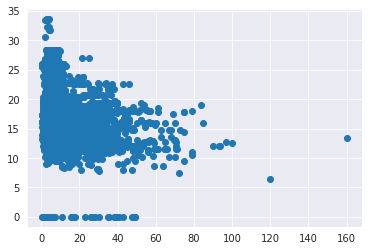

In [29]:
plt.scatter(x = data_train["Price"], y = data_train["Mileage"])
plt.show()

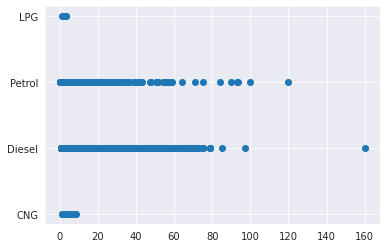

In [30]:
plt.scatter(x = data_train["Price"], y = data_train["Fuel_Type"])
plt.show()

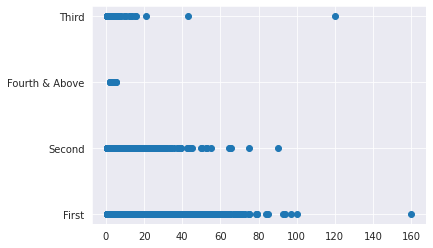

In [31]:
plt.scatter(x = data_train["Price"], y = data_train["Owner_Type"])
plt.show()

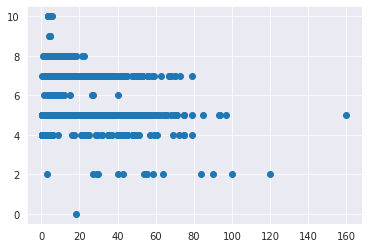

In [32]:
plt.scatter(x = data_train["Price"], y = data_train["Seats"])
plt.show()

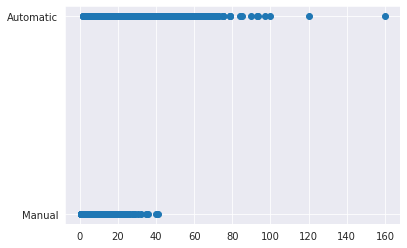

In [33]:
plt.scatter(x = data_train["Price"], y = data_train["Transmission"])
plt.show()

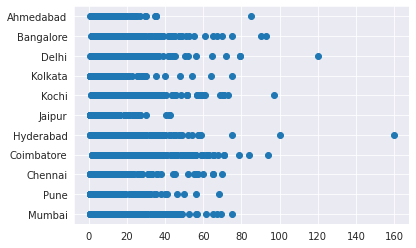

In [34]:
plt.scatter(x = data_train["Price"], y = data_train["Location"])
plt.show()

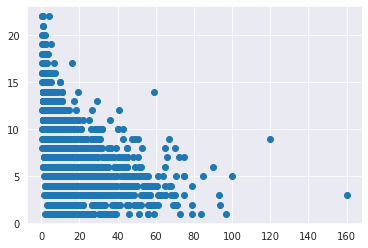

In [35]:
plt.scatter(x = tdf["Price"], y = tdf["Age"])
plt.show()

In [0]:
tdf['Year'] = tdf['Year'].astype('category')
tdf['Location'] = tdf['Location'].astype('category')

# Part 3 : Modelling and Test #1

In [0]:
X_train = data_train.drop(columns=['Price', 'Mileage'])
X_test = data_test.drop(columns=['Mileage'])
Y_train = data_train['Price']

In [0]:
object_columns = ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']
for col in object_columns:
    label_encoder = le.fit(list(X_train[col]) + list(X_test[col]))
    X_train[col] = label_encoder.transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

In [39]:
XGB_model = xgb.XGBRegressor()
XGB_model.fit(X_train, Y_train)

ValueError: ignored

In [40]:
X_train['Engine'] = X_train.groupby(['Name'])['Engine'].transform(lambda x: x.fillna((sum()/len(x))))

values = X_test[X_test['Engine'].isnull()]['Name'].values
X_test['Engine'].ix[X_test['Engine'].isnull()] = list(X_train.groupby('Name')['Engine'].mean()[values].values)

X_test['Engine'] = X_test['Engine'].fillna(X_train['Engine'].mean())

TypeError: ignored

In [41]:
X_train['Power'] = X_train.groupby(['Name'])['Power'].transform(lambda x: x.fillna(x.sum()/len(x)))

values = X_test[X_test['Power'].isnull()]['Name'].values
X_test['Power'].ix[X_test['Power'].isnull()] = list(X_train.groupby('Name')['Power'].mean()[values].values)

X_test['Power'] = X_test['Power'].fillna(X_train['Power'].mean())

TypeError: ignored

# Temporary Test #2 (with appended training and test data)

In [0]:
tdf['Fuel_Type'] = tdf['Fuel_Type'].astype('category')
tdf['Transmission'] = tdf['Transmission'].astype('category')
tdf['Owner_Type'] = tdf['Owner_Type'].astype('category')

In [0]:
tdf['Power'] = tdf['Power'].replace('null bhp','0 bhp').apply(lambda x : str(x).split(' ')[0]).astype(float)

We have cleared the null and zero values now we need to fill them with either the median values or mode at times after grouping them into respective categories

In [0]:
tdf['Category_1'] = tdf['Name'].apply(lambda x: ' '.join(x.split(' ')[:2]))

tdf['Engine'] = tdf.groupby(['Category_1']).transform(lambda x: x.fillna(x.median()))['Engine']
tdf['Power'] = tdf.groupby(['Category_1']).transform(lambda x: x.fillna(x.median()))['Power']

In [0]:
def agg_fun(x):        
    
    agg_func = {
        'Location' : ['count'],
        'Mileage' : ['mean'],
        'Power' : ['mean'],
        'Engine' : ['mean'] }
    
    agg_tdf = x.groupby(['Category_1']).agg(agg_func)
    agg_tdf.columns = ['_'.join(col).strip() for col in agg_tdf.columns.values]
    agg_tdf.reset_index(inplace=True)
    
    agg_tdf = pd.merge(x, agg_tdf, on='Category_1', how='left')
    
    return agg_tdf

In [0]:
tdf = agg_fun(tdf)

In [47]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7240 entries, 0 to 7239
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7240 non-null   object  
 1   Location           7240 non-null   category
 2   Year               7240 non-null   category
 3   Kilometers_Driven  7240 non-null   int64   
 4   Fuel_Type          7240 non-null   category
 5   Transmission       7240 non-null   category
 6   Owner_Type         7240 non-null   category
 7   Mileage            7240 non-null   float64 
 8   Engine             7240 non-null   float64 
 9   Power              7240 non-null   float64 
 10  Seats              7240 non-null   float64 
 11  Price              6006 non-null   float64 
 12  Age                7240 non-null   int64   
 13  Category_1         7240 non-null   object  
 14  Location_count     7240 non-null   int64   
 15  Mileage_mean       7240 non-null   float64 
 16  Power_

In [0]:
tf1 = TfidfVectorizer(lowercase=True, stop_words='english', ngram_range=(1, 1), max_df=1.0, min_df=2, binary=True)
tdf_name = tf1.fit_transform(tdf['Name'])
tdf_name = pd.DataFrame(data=tdf_name.toarray(), columns=tf1.get_feature_names())
tdf = pd.concat([tdf, tdf_name], axis=1)

In [49]:
temp_train = tdf[tdf['Price'].isnull()!=True]
temp_test = tdf[tdf['Price'].isnull()==True]
temp_train.shape , temp_test.shape

((6006, 672), (1234, 672))

In [0]:
temp_test = tdf.drop(columns=['Price'])

In [0]:
Xt = temp_train.drop(labels=['Price'], axis=1)
yt = temp_train['Price'].values

from sklearn.model_selection import train_test_split
Xt_train, Xt_cv, yt_train, yt_cv = train_test_split(Xt, yt, test_size=0.25, random_state=1)

In [52]:
Xt_train.shape, yt_train.shape, Xt_cv.shape, yt_cv.shape

((4504, 671), (4504,), (1502, 671), (1502,))

In [59]:
train_data = lgbm.Dataset(Xt_train, label=yt_train)
test_data = lgbm.Dataset(Xt_cv, label=yt_cv)

wt = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.05, 
         'num_iterations': 1000,
         'num_leaves': 30,
         'max_depth': -1,
         'min_data_in_leaf': 4,
         'bagging_fraction': 0.78,
         'bagging_freq': 1,
         'feature_fraction': 0.65,
         }

lgb = lgbm.train(wtg = wt,
                 verbose_eval=100,
                 early_stopping_rounds=50,
                 train_set=train_data,
                 valid_sets=[test_data])

y_pred_lgb = lgb.predict(Xt_cv)
print('RMSLE:', sqrt(mean_squared_log_error(np.expm1(yt_cv), np.expm1(y_pred_lgb))))

TypeError: ignored